In [2]:
%pylab notebook

from scipy.optimize import curve_fit
import os, sys, pandas as pd, numpy as np, seaborn as sns, importlib
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_fitting as hts, hts_fitfunctions as ff, hts_misc as misc, default_figure_style as dfs
for library in [hts, ff, misc, dfs]:
    importlib.reload(library)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


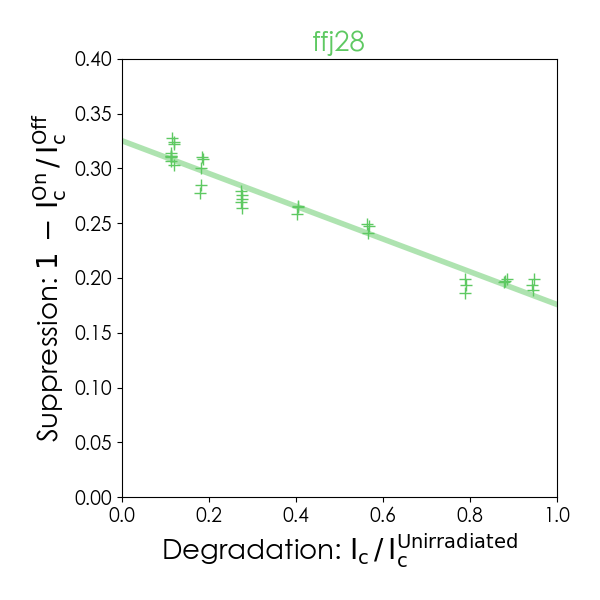

In [284]:
cols = [0, 1, 12, 13, 14, 45, 55, 56, 57, 58, 67]
names = ['tapeid', 'anneal', 'energy', 'power', 'powerErr', 'tTAR_OFF', 'degradation', 'degradationError', 
         'suppression', 'suppressionError', 'outlier']
df = pd.read_excel(dfs.master, sheet_name='data', usecols=cols, names=names, skiprows=1)

# Generic filters
cut = df.tTAR_OFF < 20
cut &= df.suppressionError/df.suppression < .1
cut &= (df.suppression != np.nan) & (df.suppression > 0) & (df.suppressionError > 0)
cut &= df.outlier != 1
df = df[cut]

fig, ax = plt.subplots()

tapeid = 'f28'
data = df[(df.tapeid == tapeid) & (34 <= df.power) & (df.power <= 38)]

x = data.degradation #x = ff.sqrt(data.degradation, *dfs.degradation_correction)
y = data.suppression
popt, pcov = curve_fit(ff.linear, x, y)
xsmooth = np.linspace(0, 1, 1000)
ysmooth = ff.linear(xsmooth, *popt)

ax.plot(xsmooth, ysmooth, linewidth=4, alpha=.5, color=dfs.colors_tapes[tapeid])
ax.plot(x, y, marker='+', linestyle='None', color=dfs.colors_tapes[tapeid], alpha=1)

ax.set_xlim(0, 1.)
ax.set_ylim(0, .4)
ax.set_title(tapeid.replace('f', 'ffj'), color=dfs.colors_tapes[tapeid])
ax.set_xlabel('Degradation: $\mathrm{I_c\, /\, I_c^{Unirradiated}}$')
ax.set_ylabel('Suppression: $\mathrm{1\, -\, I_c^{On}\, /\, I_c^{Off}}$')
fig.tight_layout()

plt.savefig(dfs.outputDirectory+'degradation.svg')

<IPython.core.display.Javascript object>


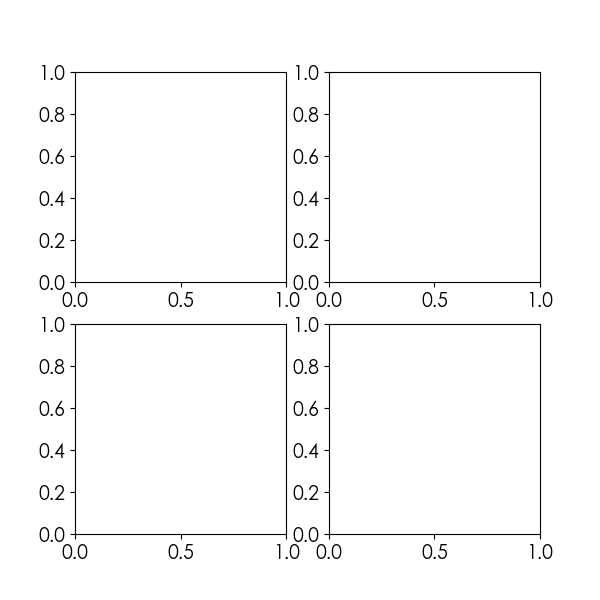

AttributeError: 'Axes' object has no attribute 'flatten'

In [280]:
cols = [0, 1, 12, 13, 14, 45, 55, 56, 57, 58, 67]
names = ['tapeid', 'anneal', 'energy', 'power', 'powerErr', 'tTAR_OFF', 'degradation', 'degradationError', 
         'suppression', 'suppressionError', 'outlier']
df = pd.read_excel(dfs.master, sheet_name='data', usecols=cols, names=names, skiprows=1)

# Generic filters
cut = df.tTAR_OFF < 20
cut &= df.suppressionError/df.suppression < .1
cut &= (df.suppression != np.nan) & (df.suppression > 0) & (df.suppressionError > 0)
cut &= df.outlier != 1
df = df[cut]

fig, axes = plt.subplots(2, 2)

for tapeid, ax in zip(['f20', 'f28', 'f29', 'f37'], axes.flatten()):
    data = df[(df.tapeid == tapeid) & (34 <= df.power) & (df.power <= 38)]
    
    x = data.degradation #x = ff.sqrt(data.degradation, *dfs.degradation_correction)
    y = data.suppression
    popt, pcov = curve_fit(ff.linear, x, y)
    xsmooth = np.linspace(0, 1, 1000)
    ysmooth = ff.linear(xsmooth, *popt)
    
    ax.plot(xsmooth, ysmooth, linewidth=4, alpha=.5, color=dfs.colors_tapes[tapeid])
    ax.plot(x, y, marker='+', linestyle='None', color=dfs.colors_tapes[tapeid], alpha=1, label=r'$\alpha$ = '+'{:4.8f}'.format(popt[0]))
    
    ax.set_xlim(0, 1.)
    ax.set_ylim(0, .4)
    ax.set_title(tapeid.replace('f', 'ffj'), color=dfs.colors_tapes[tapeid])
    ax.legend(loc='lower left')
    print(tapeid, popt)
fig.text(0.5, 0.01, 'Degradation: $\mathrm{I_c\, /\, I_c^{Unirradiated}}$', ha='center', va='center')
fig.text(0.01, 0.5, 'Suppression: $\mathrm{1\, -\, I_c^{On}\, /\, I_c^{Off}}$', ha='center', va='center', rotation='vertical')
fig.tight_layout()

plt.savefig(dfs.outputDirectory+'degradation.svg')

## Different powers same sample

<IPython.core.display.Javascript object>


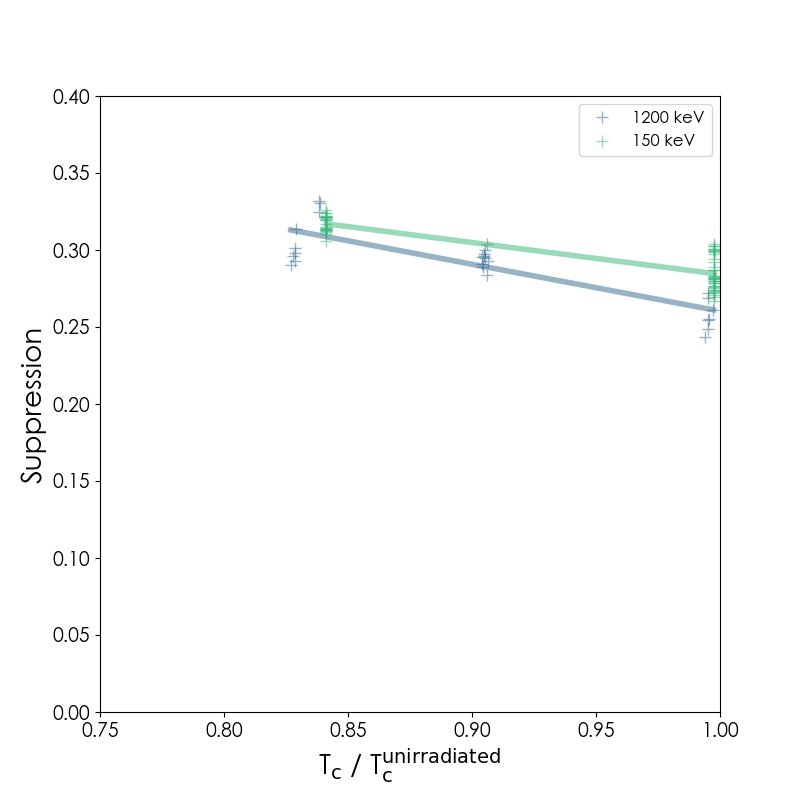

-0.304526259152534
-0.20670768343795792


In [125]:
masterfile = '../data/data-master-linear.xlsx'
cols = [0, 1, 12, 13, 14, 55, 56, 57, 58, 67]
names = [
    'tapeid', 
    'anneal', 
    'energy', 
    'power', 
    'powerErr', 
    'degradation', 
    'degradationErr', 
    'suppression', 
    'suppressionErr', 
    'outlier'
]
df = pd.read_excel(masterfile, sheet_name='data', usecols=cols, names=names, skiprows=1)

fig, ax = plt.subplots()

tape = 'f29'
energies = [1200, 150]

palette = sns.color_palette('viridis', len(energies))
for e, c in zip(energies, palette):
    data = df[(df.tapeid == tape) & (e == df.energy) & (34 <= df.power) & (df.power <= 38) & (df.outlier != 1) & np.isfinite(df.suppression)]
    d = sqrt4(data.degradation, 0.69549255, 0.75825358, 0.13084786, -0.01228445)
    ax.plot(d, data.suppression, marker='+', linestyle='None', color=c, alpha=.5, label='{} keV'.format(e))
    popt, pcov = curve_fit(hts.linear, d, data.suppression)
    xsmooth = np.linspace(np.min(d), np.max(d), 1000)
    ysmooth = hts.linear(xsmooth, *popt)
    ax.plot(xsmooth, ysmooth, linewidth=4, alpha=.5, color=c)
    print(popt[0])
ax.set_ylim(0, .4)
ax.set_xlim(.75, 1)
ax.set_xlabel('T$_\mathrm{c}$ / T$\mathrm{_c^{unirradiated}}$')
ax.set_ylabel('Suppression')
ax.legend()

<IPython.core.display.Javascript object>


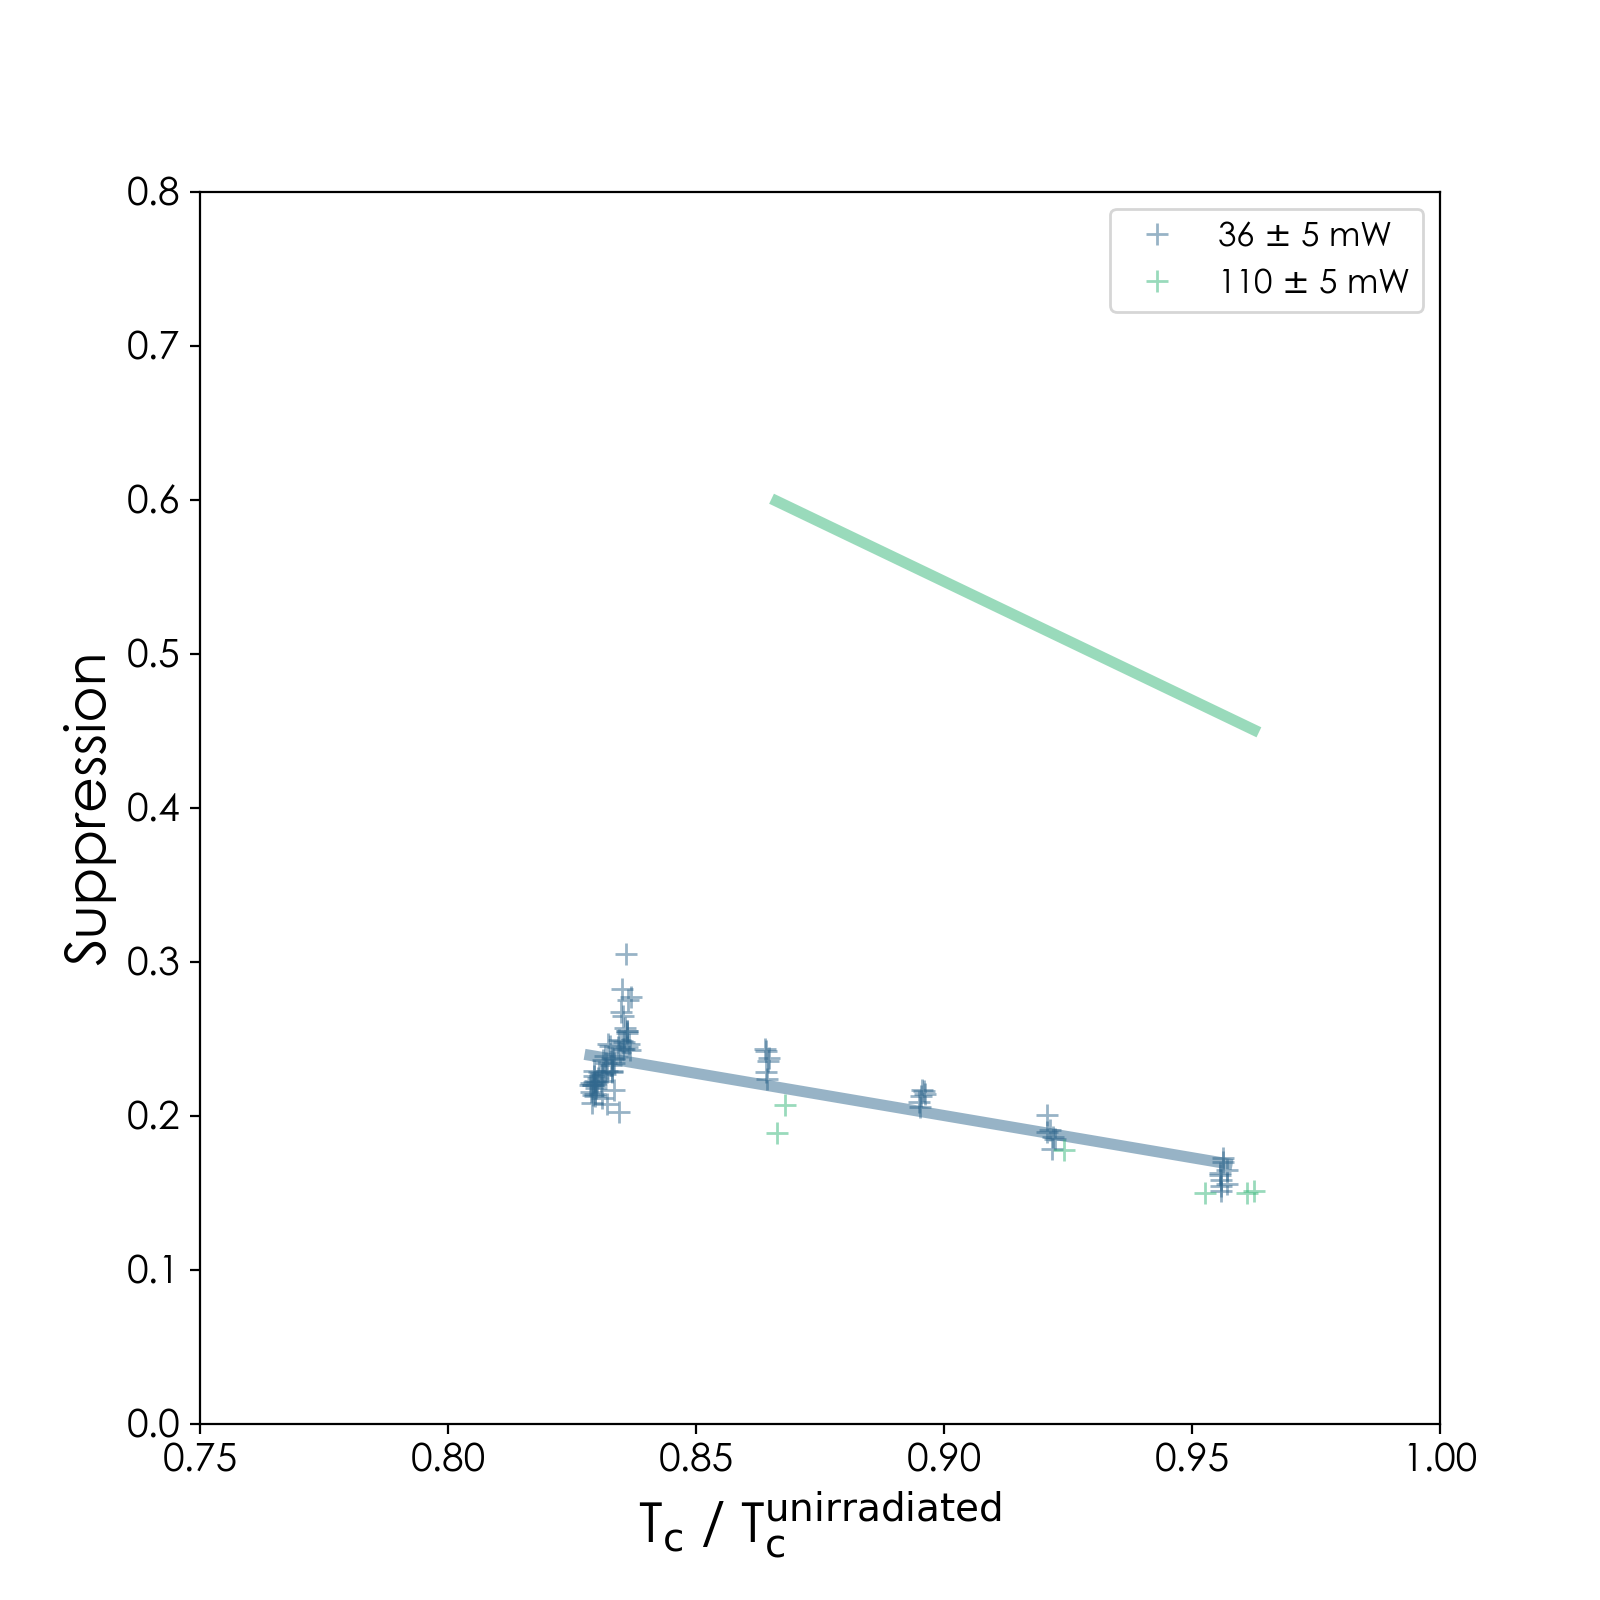

-0.5479201310828075
-1.5435628327723119


In [151]:
masterfile = '../data/data-master-linear.xlsx'
cols = [0, 1, 12, 13, 14, 55, 56, 57, 58, 67]
names = [
    'tapeid', 
    'anneal', 
    'energy', 
    'power', 
    'powerErr', 
    'degradation', 
    'degradationErr', 
    'suppression', 
    'suppressionErr', 
    'outlier'
]
df = pd.read_excel(masterfile, sheet_name='data', usecols=cols, names=names, skiprows=1)

fig, ax = plt.subplots()

tape = 'f37'
powers = [36, 110]

palette = sns.color_palette('viridis', len(energies))
for p, c, div in zip(powers, palette, [1, 3]):
    data = df[(df.tapeid == tape) & (1200 == df.energy) & (p-5 <= df.power) & (df.power <= p+5) & (df.outlier != 1) & np.isfinite(df.suppression)]
    d = sqrt4(data.degradation, 0.69549255, 0.75825358, 0.13084786, -0.01228445)
    ax.plot(d, data.suppression/div, marker='+', linestyle='None', color=c, alpha=.5, label='{} $\pm$ 5 mW'.format(p))
    popt, pcov = curve_fit(hts.linear, d, data.suppression)
    xsmooth = np.linspace(np.min(d), np.max(d), 1000)
    ysmooth = hts.linear(xsmooth, *popt)
    ax.plot(xsmooth, ysmooth, linewidth=4, alpha=.5, color=c)
    print(popt[0])
ax.set_ylim(0, .8)
ax.set_xlim(.75, 1)
ax.set_xlabel('T$_\mathrm{c}$ / T$\mathrm{_c^{unirradiated}}$')
ax.set_ylabel('Suppression')
ax.legend()